<a href="https://colab.research.google.com/github/Samgoles/Shopify-Technical-assignment/blob/main/Shopigy-technical-assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Section #1



### Importing Data and packages. 
###Data Exploration

In [ ]:
import pandas as pd


##importing data
sheet_url = 'https://docs.google.com/spreadsheets/d/16i38oonuX1y1g7C_UAmiK9GkY7cS-64DfiDMNiR41LM/edit#gid=0'
url = sheet_url.replace('/edit#gid=', '/export?format=csv&gid=')
data=pd.read_csv(url)

In [ ]:
data.head()

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
0,1,53,746,224,2,cash,2017-03-13 12:36:56
1,2,92,925,90,1,cash,2017-03-03 17:38:52
2,3,44,861,144,1,cash,2017-03-14 4:23:56
3,4,18,935,156,1,credit_card,2017-03-26 12:43:37
4,5,18,883,156,1,credit_card,2017-03-01 4:35:11


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   order_id        5000 non-null   int64 
 1   shop_id         5000 non-null   int64 
 2   user_id         5000 non-null   int64 
 3   order_amount    5000 non-null   int64 
 4   total_items     5000 non-null   int64 
 5   payment_method  5000 non-null   object
 6   created_at      5000 non-null   object
dtypes: int64(5), object(2)
memory usage: 273.6+ KB


In [ ]:
#checking if there is duplicate lines (there is not, very clean data :D)
data.duplicated().sum()

0

In [ ]:
#checking the types of the columns (the date one is object and need to be converted to datetime format)
data.dtypes

order_id            int64
shop_id             int64
user_id             int64
order_amount        int64
total_items         int64
payment_method     object
created_at         object
av                float64
dtype: object

In [ ]:
data['created_at']=pd.to_datetime(data['created_at'])
data.dtypes

order_id                   int64
shop_id                    int64
user_id                    int64
order_amount               int64
total_items                int64
payment_method            object
created_at        datetime64[ns]
av                       float64
dtype: object

(array([736389., 736393., 736397., 736401., 736405., 736409., 736413.,
        736417., 736420.]), <a list of 9 Text major ticklabel objects>)

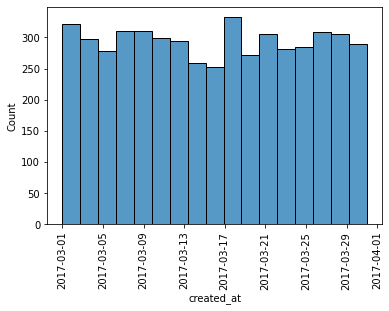

In [ ]:
#checking the date of the orders
import seaborn as sns
sns.histplot(data=data, x='created_at')
plt.xticks(rotation=90)

the data includs sneaker sales during March of 2017. (1 Mrch to 30 Mrch)

(array([-20.,   0.,  20.,  40.,  60.,  80., 100., 120.]),
 <a list of 8 Text major ticklabel objects>)

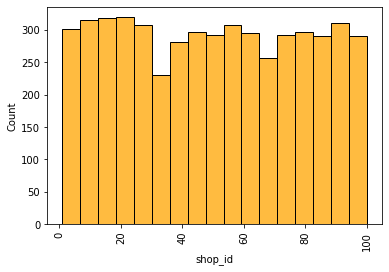

In [ ]:
#check the distribution of shop_id in all ordes. 
sns.histplot(data=data, x='shop_id',color='Orange')
plt.xticks(rotation=90)

we have almost balanced number of orders across shop_ids .

Text(0.5, 1.0, 'The histogram of the order_amount ')

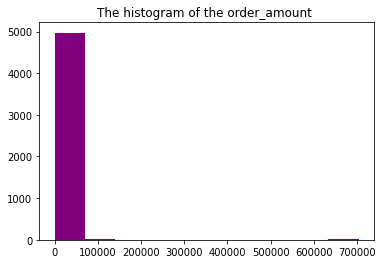

In [ ]:
#check the distribution of shop id in all ordes. 
plt.hist(data['order_amount'],color='purple')
plt.title('The histogram of the order_amount ')


It seems that there are outliers with large values for order_amount.




# Section #2


 ### 2.1 Checking the statistics of the data

In [ ]:
data[['order_amount','total_items','av']].describe()

,order_amount,total_items,av
count,5000.000000,5000.00000,5000.000000
mean,3145.128000,8.78720,387.742800
std,41282.539349,116.32032,2441.963725
min,90.000000,1.00000,90.000000
25%,163.000000,1.00000,133.000000
50%,284.000000,2.00000,153.000000
75%,390.000000,3.00000,169.000000
max,704000.000000,2000.00000,25725.000000



Seems the AOV is considered as the mean value of order_amount columns which is  the average value of all orders. By looking at the distribution, the max numbers (outliers) are far from the mean and the quartiles. Also there is a large gap between the mean and the quartiles, while the quartiles are close to one another, which confirms the existence of the outliers.
by looking at the statistics above we can identify two types of outliers that can make the AOV number meaningless. the 1st type are bulk purchases as seen from the stats of the total_items(the max is much larger than the higher quartile),the 2nd type of outliers are the orders with very large average price per item (av), as seen from the stats of av -the max is much larger than the higher quartile.- which can indicate suspecious sales since the sneaker prices are a lot lower than $25000.

The mean is not a good metric for evaluating this dataset as it is highly sensetive to the outliers. Instead, mode (most frequently occuring value) and median (the middle value) could be more representative of order values. 

Another way is to set aside the outliers and calculate the statistic of remaining dataset. The mean might be useful then.

### mode

In [ ]:
data[['order_amount','total_items','av']].mode()

,order_amount,total_items,av
0,153,2,153.0


###median

In [ ]:
pd.DataFrame(data[['order_amount','total_items','av']].median()).T

,order_amount,total_items,av
0,284.0,2.0,153.0


# Section 3
##checking the outliers

In [ ]:
data_shopId=data.groupby(['shop_id']).agg({'order_amount':'sum','total_items':'sum','order_id':'count'}).reset_index()
data_shopId['aveprice_shop']=data_shopId['order_amount']/data_shopId.total_items

Text(0, 0.5, 'averga price of sneakers for each shop')

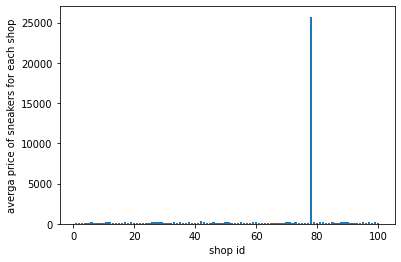

In [ ]:

plt.bar(data['shop_id'],data['av'])
plt.xlabel('shop id')
plt.ylabel('averga price of sneakers for each shop')

In [ ]:
data_shopId.sort_values(by=['aveprice_shop'],ascending=False).head()

,shop_id,order_amount,total_items,order_id,aveprice_shop
77,78,2263800,88,46,25725.0
41,42,11990176,34063,51,352.0
11,12,18693,93,53,201.0
88,89,23128,118,61,196.0
98,99,18330,94,54,195.0


Text(0.5, 1.0, 'averga price of sneakers for shop 78')

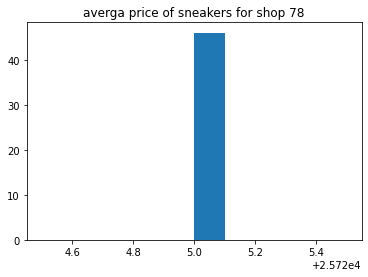

In [ ]:
plt.hist(data[data['shop_id']==78]['av'])

plt.title('averga price of sneakers for shop 78')

### 3.1 So all the data from the shop_id 78 is outliers 




Text(0, 0.5, 'order amount of sneakers for each shop')

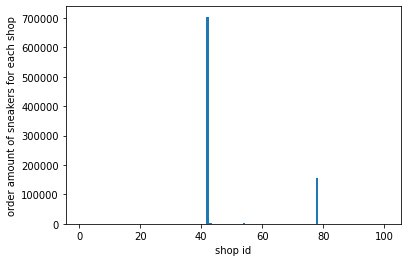

In [ ]:
plt.bar(data['shop_id'],data['order_amount'])
plt.xlabel('shop id')
plt.ylabel('order amount of sneakers for each shop')


In [ ]:
data_shopId.sort_values(by=['order_amount'],ascending=False).head()

,shop_id,order_amount,total_items,order_id,aveprice_shop
41,42,11990176,34063,51,352.0
77,78,2263800,88,46,25725.0
88,89,23128,118,61,196.0
80,81,22656,128,59,177.0
5,6,22627,121,59,187.0


### 3.2 the shop id of 42 has the higher total_items per order. which leads to act like outlier.

<BarContainer object of 5000 artists>

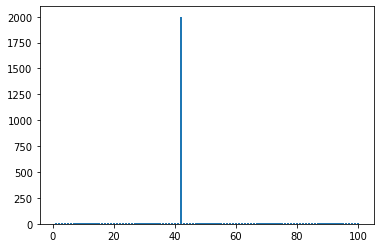

In [ ]:
plt.bar(data['shop_id'],data['total_items'])

In [ ]:
data_shopId.sort_values(by=['total_items'],ascending=False).head()

,shop_id,order_amount,total_items,order_id,aveprice_shop
41,42,11990176,34063,51,352.0
12,13,21760,136,63,160.0
83,84,20196,132,59,153.0
70,71,21320,130,66,164.0
52,53,14560,130,68,112.0


Text(0.5, 1.0, 'The total_items of sneakers for shop_id 42')

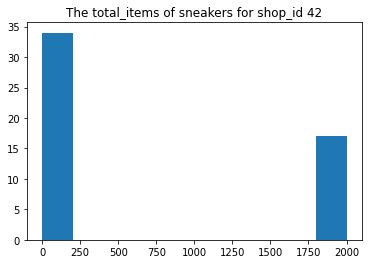

In [ ]:
plt.hist(data[data['shop_id']==42]['total_items'])

plt.title('The total_items of sneakers for shop_id 42')

### 3.3 for shop_id 42 the total_items more than 250 could be consider as outlier. as the average_price for item(av) can be accepted I keep the one lower than 250.

#  Section 4
## Removing outliers

In [ ]:
outlier1=data[data['total_items']>250]
outlier1

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at,av,order amount
15,16,42,607,704000,2000,credit_card,2017-03-07 04:00:00,352.0,704000
60,61,42,607,704000,2000,credit_card,2017-03-04 04:00:00,352.0,704000
520,521,42,607,704000,2000,credit_card,2017-03-02 04:00:00,352.0,704000
1104,1105,42,607,704000,2000,credit_card,2017-03-24 04:00:00,352.0,704000
1362,1363,42,607,704000,2000,credit_card,2017-03-15 04:00:00,352.0,704000
1436,1437,42,607,704000,2000,credit_card,2017-03-11 04:00:00,352.0,704000
1562,1563,42,607,704000,2000,credit_card,2017-03-19 04:00:00,352.0,704000
1602,1603,42,607,704000,2000,credit_card,2017-03-17 04:00:00,352.0,704000
2153,2154,42,607,704000,2000,credit_card,2017-03-12 04:00:00,352.0,704000
2297,2298,42,607,704000,2000,credit_card,2017-03-07 04:00:00,352.0,704000


### 4.1 so the threshold of 250 is fine for total_items.

(array([-5000.,     0.,  5000., 10000., 15000., 20000., 25000., 30000.]),
 <a list of 8 Text major ticklabel objects>)

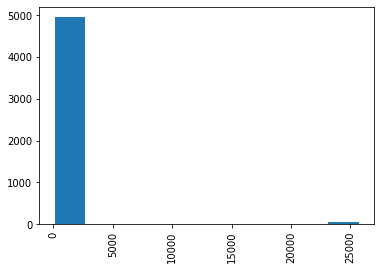

In [ ]:
plt.hist(data['av'])
plt.xticks(rotation=90)

(array([ 50., 100., 150., 200., 250., 300., 350., 400.]),
 <a list of 8 Text major ticklabel objects>)

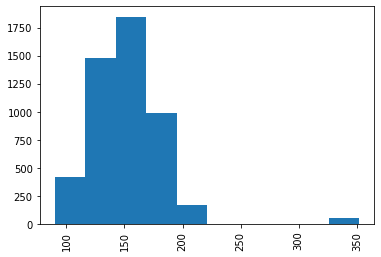

In [ ]:
plt.hist(data[data['av']<2500]['av'])
plt.xticks(rotation=90)

### 4.2 after removing the data with av>20K, the final threshold is set to av<230

Text(0.5, 1.0, 'the histogram for order_amount')

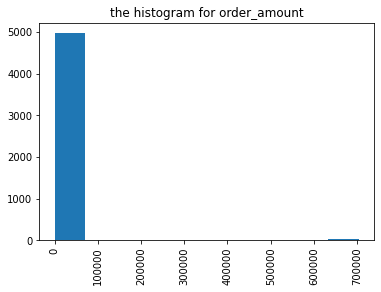

In [ ]:
plt.hist(data['order_amount'])
plt.xticks(rotation=90)
plt.title('the histogram for order_amount')

Text(0.5, 1.0, 'The histogram for order_amount <10K')

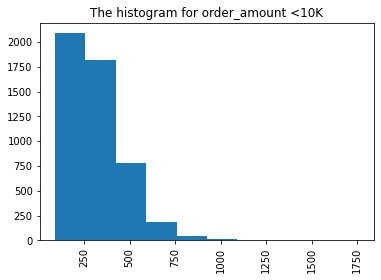

In [ ]:
plt.hist(data[data['order_amount']<10000]['order_amount'])
plt.xticks(rotation=90)

plt.title('The histogram for order_amount <10K')

4.3 after removing the data with order_amount>10K, the final threshold is set to order_amount<1250

In [ ]:
data_without_Outlier=data[(data['order_amount']<1250) & ## 
              (data['total_items']<250) & #(section 3.3 & 4.1)
              (data['shop_id'] !=78) & #(section 3.1)
             # (data['shop_id'] !=42)]
             (data['av']<230)]#(section 4.2)

In [ ]:
data_without_Outlier[['order_amount','total_items','av']].describe()

,order_amount,total_items,av
count,4903.000000,4903.000000,4903.000000
mean,300.155823,1.995717,150.400163
std,155.941112,0.982602,23.851202
min,90.000000,1.000000,90.000000
25%,163.000000,1.000000,132.000000
50%,284.000000,2.000000,153.000000
75%,386.500000,3.000000,166.000000
max,1086.000000,8.000000,201.000000


##mode

In [ ]:
data_without_Outlier[['order_amount','av']].mode()

,order_amount,av
0,153,153.0


## median

In [ ]:
pd.DataFrame(data_without_Outlier[['order_amount','av']].median())

,0
order_amount,284.0
av,153.0


4.3 so we can see that after removing the outliers the mean(AOV) gets more reasonable value,alse the differences between the means and Quartiles,  while mode and median has not been changeing by 
removing outliers. which shows that they are much less sensetive to the outliers.


In [ ]:
data[['order_amount','total_items','av']].describe()

,order_amount,total_items,av
count,5000.000000,5000.00000,5000.000000
mean,3145.128000,8.78720,387.742800
std,41282.539349,116.32032,2441.963725
min,90.000000,1.00000,90.000000
25%,163.000000,1.00000,133.000000
50%,284.000000,2.00000,153.000000
75%,390.000000,3.00000,169.000000
max,704000.000000,2000.00000,25725.000000


In [ ]:
data_without_Outlier[['order_amount','total_items','av']].describe()

,order_amount,total_items,av
count,4903.000000,4903.000000,4903.000000
mean,300.155823,1.995717,150.400163
std,155.941112,0.982602,23.851202
min,90.000000,1.000000,90.000000
25%,163.000000,1.000000,132.000000
50%,284.000000,2.000000,153.000000
75%,386.500000,3.000000,166.000000
max,1086.000000,8.000000,201.000000
